In [1]:
# Import important libraries 
import tensorflow as tf
import pandas as pd
from IPython.display import YouTubeVideo
import os
import pickle

In [2]:
records_path = "./2/frame/train"

In [3]:
print(records_path)

./2/frame/train


In [4]:
# The filteres lists contains features of only Television Advertisment entity
# Initialize lists to store filtered data
filtered_vid_ids = [] # This array stores the video IDs of Television Advertisement label extracted from the TFRecord file.
filtered_labels = []  # This array stores the label_ids associated with Television Advertisment label_id(315). The label ids are mapped to label names through vocabulary.csv
                      # which is discussed later. 
filtered_rgb = []     # This array stores the RGB features of Television Advertisement label.
filtered_audio = []   # This array stores the audio features of Television Advertisement label.

## Structure of Frame-level features @Yt8m
```
Frame-level features are stored as tensorflow.SequenceExample protocol buffers. A tensorflow.SequenceExample proto is reproduced here in text format:
context: {
  feature: {
    key  : "id"
    value: {
      bytes_list: {
        value: (Video id)
      }
    }
  }
  feature: {
    key  : "labels"
      value: {
        int64_list: {
          value: [1, 522, 11, 172]  # label list
        }
      }
    }
}

feature_lists: {
  feature_list: {
    key  : "rgb"
    value: {
      feature: {
        bytes_list: {
          value: [1024 8bit quantized features]
        }
      }
      feature: {
        bytes_list: {
          value: [1024 8bit quantized features]
        }
      }
      ... # Repeated for every second, up to 300
  }
  feature_list: {
    key  : "audio"
    value: {
      feature: {
        bytes_list: {
          value: [128 8bit quantized features]
        }
      }
      feature: {
        bytes_list: {
          value: [128 8bit quantized features]
        }
      }
    }
    ... # Repeated for every second, up to 300
  }

}
```

In [5]:
# Function for decoding quantized features
def decode_quantized_features(features):
    return tf.io.decode_raw(features, tf.uint8)

# List all .tfrecord files in the directory
tfrecord_files = [os.path.join(records_path, f) for f in os.listdir(records_path) if f.endswith('.tfrecord')]
# print(tfrecord_files)

# Iterate over each .tfrecord file
for tfrecord_file in tfrecord_files:
    print(f'Processing file: {tfrecord_file}')
    # Iterate over each tfrecord in the TFRecord files 
    for record in tf.compat.v1.python_io.tf_record_iterator(tfrecord_file):
        # Parse the SequenceExample from the binary record data
        seq_example = tf.train.SequenceExample.FromString(record)

        # Extract the video_id and labels
        vid_id = seq_example.context.feature['id'].bytes_list.value[0].decode(encoding='UTF-8')
        labels_list = seq_example.context.feature['labels'].int64_list.value
        
        # Check if the label ID 315 is in the labels list(label id 315 corresponds to Television Advertisement)
        if 315 in labels_list:
            # Append video ID and labels to the filtered lists
            filtered_vid_ids.append(vid_id)
            filtered_labels.append(labels_list)
            
            # Lists to store frame-level and audio-level features
            rgb_features = []
            audio_features = []

            # Iterate over each frame-level feature pair (RGB and audio) in the SequenceExample
            for rgb_feature, audio_feature in zip(seq_example.feature_lists.feature_list['rgb'].feature,
                                                  seq_example.feature_lists.feature_list['audio'].feature):

                # Decode the quantized RGB features and audio features
                decoded_rgb = decode_quantized_features(rgb_feature.bytes_list.value[0])
                decoded_audio = decode_quantized_features(audio_feature.bytes_list.value[0])

                rgb_features.append(decoded_rgb)
                audio_features.append(decoded_audio)

            # Append frame-level lists to the main filtered lists
            filtered_rgb.append(rgb_features)
            filtered_audio.append(audio_features)

# At this point, filtered_vid_ids, filtered_labels, filtered_rgb, and filtered_audio
# contain the data for videos with the label "Television advertisement".

Processing file: ./2/frame/train/train2980.tfrecord
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Processing file: ./2/frame/train/train1210.tfrecord
Processing file: ./2/frame/train/train1745.tfrecord
Processing file: ./2/frame/train/train1920.tfrecord
Processing file: ./2/frame/train/train3702.tfrecord
Processing file: ./2/frame/train/train1463.tfrecord
Processing file: ./2/frame/train/train1137.tfrecord
Processing file: ./2/frame/train/train2636.tfrecord
Processing file: ./2/frame/train/train2748.tfrecord
Processing file: ./2/frame/train/train0429.tfrecord
Processing file: ./2/frame/train/train0075.tfrecord
Processing file: ./2/frame/train/train2314.tfrecord
Processing file: ./2/frame/train/train1414.tfrecord
Processing file: ./2/frame/train/train1415.tfrecord
Processing file: ./2/frame/train/train1326.tfrecord
Processing file: ./2/frame/train/train3220.tfrecord
Processing file: ./2/frame/train/train2641.tfrecord
Processing file: ./2/frame/trai

In [6]:
 print(filtered_labels)

[[315], [315, 505, 1206], [315], [315], [5, 16, 315, 505, 847], [271, 315, 2587], [192, 315, 331, 455], [315, 505], [315, 505], [5, 16, 49, 315], [11, 315, 505], [315], [315, 505, 2960], [315], [315], [315], [315], [2, 7, 197, 315, 316], [315, 505], [315, 505], [315, 505], [12, 315, 2587], [315, 505, 813, 903, 2206], [315, 505], [25, 315], [11, 29, 32, 315, 505, 813, 969, 2202, 2746], [315, 505], [5, 16, 315, 1082], [315, 347], [315], [315], [315], [315], [26, 315, 999], [315, 505], [315, 505, 3514], [2, 7, 48, 283, 315, 2668, 3531], [315], [5, 16, 25, 136, 315, 1131], [315, 505], [315], [5, 16, 315, 505], [16, 246, 315, 505], [25, 315], [315], [315, 505], [315, 505], [2, 44, 315], [315, 505], [315, 505], [315, 505], [315], [16, 315, 1131, 1594], [315, 1601], [315, 505], [315, 505, 749], [315, 505], [1, 5, 315, 1033, 1228], [315, 505], [315, 505], [0, 1, 16, 315, 505], [315], [315, 505], [25, 315, 1533], [315, 505, 1206], [5, 16, 315, 1082], [315, 505], [16, 315, 505], [315], [25, 315,

In [7]:
print(filtered_vid_ids)

['UCWe', 'BlWe', 'uzWe', 'NfWe', 'IiCj', 'l5Cj', 'WiE8', 'WbE8', 'znE8', 'ioxL', 'DXsv', '6Ssv', '3aQG', 'hgSu', 'Cwg5', 'q0g5', '4Ig5', 'SGLu', 'P0vy', 'i2Z6', 'iPZ6', 'GpQL', 'SdRI', 'SAfR', 'bzfQ', 'EOr3', 'RXr3', 'oXrM', 'qdFP', 'cpVK', 'XGVK', 'eOVL', 'A1un', 'eVbN', '7sbN', '9tzk', 'nCAI', 'VxAI', '8s8u', 'NUM5', 'sVZ0', 'snTv', 'UJTv', 'O7yO', 'QkyP', 's9yP', 'ir5r', 'yo5r', 'FuX6', 'txX6', 'wvdG', 'mDdG', 'yhdG', 'wGdG', 'Ju4V', 'hx4V', 'vHnp', '0yOT', 'FXCI', 'fQ3b', 'q1Gd', 'xn7s', 'ZK7s', 'od7s', 'I3iS', 'E1WY', 'w0Eq', 'lOs1', 'eCs1', '4Ps1', 'CSgD', 'D3gD', '2AgD', 'sOWu', 'b5Wu', 'w0Wu', 'WVkV', 'dFcE', '6pwo', 'jGN9', '2jN9', 'Jfog', 'Poog', 'OOog', 'prhR', 'jehR', 'cT6A', 'qp6A', 'Hcmh', '5Imh', '2ceX', 'cbjH', 'uqjH', 'qTOq', 'ODih', 'F7R4', 'rWhj', 'E4b2', 'Q0b2', 'hCF1', 'dIF1', 'aWSA', 'gF7c', 'TP7c', 'uWK8', 'UXXQ', 'ikXQ', 'g1d8', 'gflh', 'JOlh', '5aWK', 'X0Bm', 'jHeA', 'UJeA', 'gFeA', 'uErm', 'Awrm', 'SA1v', '2a1v', 'ni1v', 'tFWo', 'niHj', 'MayS', 'kmUY', 'JAUY',

- filtered_vid_id 'i2Z6' maps to 'xkPtJ6mfWHA' Youtube Video id. 

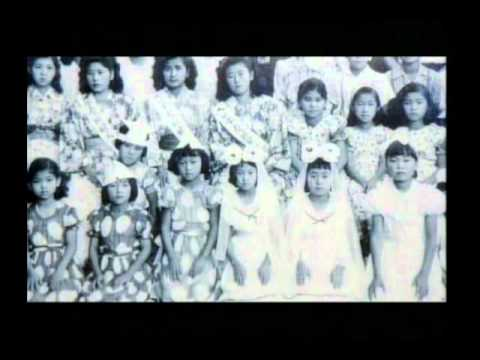

In [8]:
YouTubeVideo('xkPtJ6mfWHA')

- From the above video, it is clear that filtered_vid_id 'i2z6' is a commercial.

In [9]:
print('Number of videos in the new commercial dataset: ',len(filtered_vid_ids))
print ('Number of labels in the new commercial dataset: ', len (filtered_labels))
print('Length of visual features: ', len(filtered_rgb))
print('Length of audio features', len(filtered_audio))
print('Picking a youtube video id:',filtered_vid_ids[5])

Number of videos in the new commercial dataset:  459
Number of labels in the new commercial dataset:  459
Length of visual features:  459
Length of audio features 459
Picking a youtube video id: l5Cj


In [10]:
print(filtered_vid_ids[:10])

['UCWe', 'BlWe', 'uzWe', 'NfWe', 'IiCj', 'l5Cj', 'WiE8', 'WbE8', 'znE8', 'ioxL']


In [11]:
print(filtered_labels[:10])

[[315], [315, 505, 1206], [315], [315], [5, 16, 315, 505, 847], [271, 315, 2587], [192, 315, 331, 455], [315, 505], [315, 505], [5, 16, 49, 315]]


In [13]:
print(len(filtered_rgb[10]))

226


In [14]:
print(filtered_audio[0])

[<tf.Tensor: shape=(128,), dtype=uint8, numpy=
array([196,  85, 117, 168, 161,  94, 166, 105, 123, 186,  68,  19, 139,
       151, 134, 203, 135,  83, 152, 139,  98, 144,  80,  32, 120, 165,
       135, 105, 108,  87, 107, 109, 112, 117, 203, 120, 120,  91,  92,
       115, 209, 164, 144, 175, 200,  90, 132,  57, 138, 120, 103, 154,
        49, 142, 155,  78, 206, 152, 121, 196, 171,  54,  96, 105,   0,
       210, 118, 130, 111, 234,  80, 227, 142, 211, 162, 135,  61, 104,
       217, 196, 175, 169, 199,  44, 107, 214, 214,  98,  99,  70, 159,
        96, 125, 156, 136, 140, 124, 118,  87, 196, 201, 234,  80,  66,
        65, 143,  49, 178,  74, 248, 152, 156, 169, 163, 106,  61,  71,
        94, 169, 145, 189,  91, 136,  79,  73, 152,  66, 203], dtype=uint8)>, <tf.Tensor: shape=(128,), dtype=uint8, numpy=
array([200,  79, 136, 152, 159, 131, 157, 101, 104, 172, 105, 139, 134,
       203,  11, 136, 156,  44, 146, 106,  95, 176,  87,  14,  62, 154,
       193,  69,  97, 112, 169, 172, 

In [15]:
print(filtered_rgb[0][10])

tf.Tensor([ 91 201  79 ... 168 202  56], shape=(1024,), dtype=uint8)


In [16]:
# The filtered audio-visual features of Television Advertisement is saved 
with open('filtered_rgb.pkl', 'wb') as f:
    pickle.dump(filtered_rgb, f)

with open('filtered_audio.pkl', 'wb') as f:
    pickle.dump(filtered_audio, f)

print('Filtered data features saved successfully.')

Filtered data features saved successfully.
